# Projeto WPT Eletromagnetismo - 2023.1 - Prof. Fabio Hage
#### Luca Mizrahi, Enricco Gemha, Gustavo Oliveira

In [72]:
#Imports para o projeto
import numpy as np
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Funções do projeto WPT (Wireless Power Transfer)

In [73]:
# R1, R2, Rc => Resistências das bobinas primárias e secundárias
# L1 = L2 = L => A indutância das bobinas é igual
# M = L, pois M = sqrt(L^2)
# C1 = C2 = C => A capacitância dos capacitores é igual
# k => Coeficiente de acoplamento

#Função para cálculo da corrente no primário e secundário
def CalcularTransformador_projeto(Uf, R1, R2, Rc, L, C, k, f):
    w = 2*pi*f
    XL = 1j*w*L
    XC = 1/(1j*w*C)
    M = k*L
    XM = 1j*w*M
    Z=np.array([[R1+XL+XC, -XM],[-XM, XL+R2+((Rc*XC)/(Rc+XC))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

#Função para cálculo da frequência de ressonância
def CalculaFrequenciaRessonancia(L, C):
    return 1/(2*pi*sqrt(L*C))

#Função para cálculo da potência real
def Calcula_Potencia(V, i):
    return V/sqrt(2)*i.conjugate()/sqrt(2)

#Função para cálculo da eficiência
def calcula_eficiencia(S1,S2):
    return S2.real/S1.real

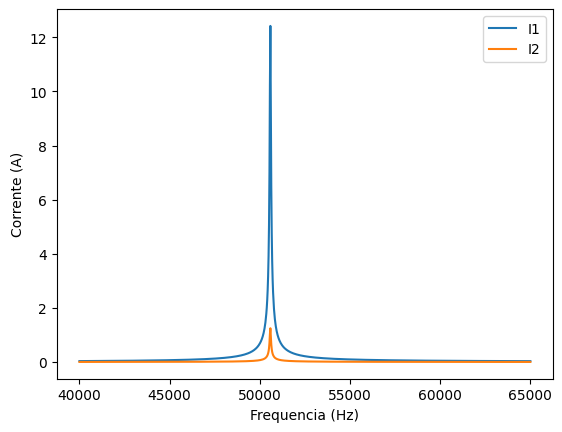

50585.585585585584
Frequencia de ressonancia:  (50329.21210448704+0j)


In [74]:
lista_freq = np.linspace(40000, 65e3, 1000)
maior_valor = 0
lista_i1 = []
lista_i2 = []
for freq in lista_freq:
    I1, I2 = CalcularTransformador_projeto(50, 1, 1, 300, 10e-3, 1e-9, 0.1, freq)
    lista_i1.append(abs(I1))
    lista_i2.append(abs(I2))

# plotar duas curvas no mesmo grafico de i1 e i2 por freq
plt.plot(lista_freq, lista_i1, label="I1")
plt.plot(lista_freq, lista_i2, label="I2")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Corrente (A)")
plt.legend()
plt.show()
print(lista_freq[lista_i1.index(max(lista_i1))])
# Calculo da frequencia de ressonancia
freq_r = 1/(2*pi*sqrt(10e-3*1e-9))
print("Frequencia de ressonancia: ", freq_r)

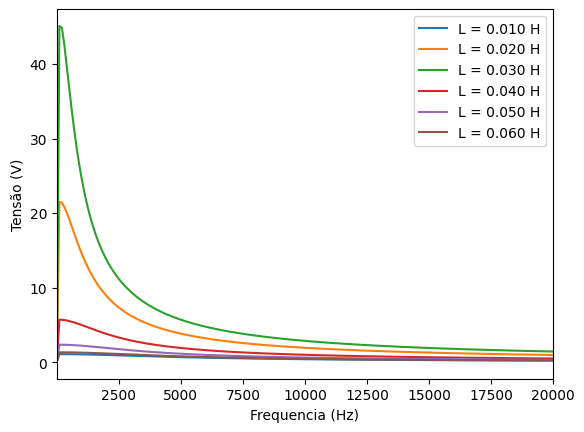

In [75]:
#Criando uma lista para as legendas do gráfico
lista_L = np.linspace(0.01, 0.06, 6)
lista_legendas = []
for l in lista_L:
    legenda = str("L = {:.3f} H".format(l))
    lista_legendas.append(legenda)

Rc = 300
lista_freq_r = np.linspace(1, 100000, 1000)
lista_V2 = []

for l in lista_L:
    lista_V2_individual = []
    for freq in lista_freq_r:
        # Cálculo da capacitância
        C = 1/(freq**2)*(4*pi**2)*l
        I1, I2 = CalcularTransformador_projeto(50, 1, 1, Rc, l, C, 0.1, freq)
        #Cálculo da tensão no secundário
        XC = 1/(1j*freq*2*pi*C)
        V2 = I2*((Rc*XC)/(Rc+XC))
        lista_V2_individual.append(abs(V2))
    lista_V2.append(lista_V2_individual)

# Plot de V2 por freq para cada valor de L
lista_L = list(lista_L)
i = 0
for lista_V2_individual in lista_V2:
    # lista_freq_r = lista_freq_r[]
    # lista_V2_individual = lista_V2_individual[]
    plt.plot(lista_freq_r, lista_V2_individual, label=lista_legendas[i])
    i += 1
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Tensão (V)")
plt.xlim(1, 20000)
plt.legend()
plt.show()


C:\Users\luca mizrahi\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


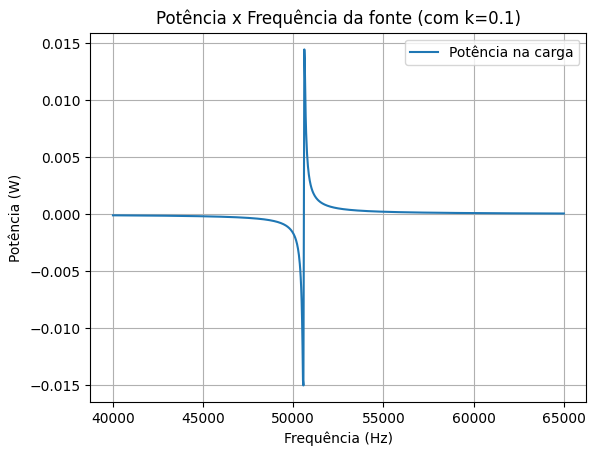

Potência máxima para k=0.1:  (0.014470132394033297+0.018023179927971218j)


In [76]:
lista_iRC = []
lista_eficiencia = []
lista_potencia_carga = []

L = 10e-3
C = 1e-9
Rc = 300
Uf = rect(50, 0)

#Calculando potência e eficiência em função da frequência.
for f in lista_freq:
    i1, i2 = CalcularTransformador_projeto(Uf, 1, 1, Rc, L, C, 0.1, f)
    w = 2*pi*f
    Pot = Calcula_Potencia(Uf, i1)
    Z_eq_carga = ((1/(1j*w*C))*Rc)/((1/(1j*w*C))+Rc)
    V_carga = i2*Z_eq_carga
    I_Rc = V2/Rc
    Pot_carga = Calcula_Potencia(V_carga, I_Rc)
    #Adiciona os resultados na lista
    lista_potencia_carga.append(Pot_carga)
    lista_eficiencia.append(calcula_eficiencia(Pot, Pot_carga))

#Plotando a eficiência em função da frequência
plt.plot(lista_freq, lista_potencia_carga, label="Potência na carga")
plt.title("Potência x Frequência da fonte (com k=0.1)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")
plt.legend()
plt.grid(True)
plt.show()

# Cálculo da potência máxima para o k=0.1
print("Potência máxima para k=0.1: ", max(lista_potencia_carga))
